# 02807 Computational Tools for Data Science Group Project

## Importing the data

In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Read CSV files from 'data' directory
csv_files = glob.glob(os.path.join("data", "*.csv"))

In [4]:
# Generate Pandas DataFrames from CSV files
df_all = [pd.read_csv(file) for file in csv_files]

In [5]:
# Concatenate DataFrames
df = pd.concat(df_all, ignore_index=True)

## Cleaning the data

In [6]:
# Inspect data types and missing values
pd.DataFrame({'Data Type': df.dtypes, 'Missing Values': df.isnull().sum(), 'Percentage Missing Values': round((df.isnull().sum() / len(df)) * 100, 2)})

,Data Type,Missing Values,Percentage Missing Values
carrier_code,object,0,0.00
flight_number,int64,0,0.00
origin_airport,object,0,0.00
destination_airport,object,0,0.00
date,object,0,0.00
scheduled_elapsed_time,int64,0,0.00
tail_number,object,13556,0.25
departure_delay,int64,0,0.00
arrival_delay,int64,0,0.00
delay_carrier,int64,0,0.00


### Missing values

In [7]:
# Drop 'tail_number' column (due to missing values and insignificance)
df = df.drop(['tail_number'], axis=1)

In [8]:
# Drop rows with any missing values across all columns other than the departure and arrival columns (= cancelled flights)
df = df.dropna(subset=df.columns.difference(['actual_departure_dt', 'actual_arrival_dt']))

### Data types

In [9]:
# Convert date columns to datetime format
date_columns = ['date', 'scheduled_departure_dt', 'scheduled_arrival_dt', 'actual_departure_dt', 'actual_arrival_dt']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [10]:
# Enumerate and replace weather station identification numbers for readability
unique_values = pd.concat([df['STATION_x'], df['STATION_y']]).unique()

id_dict = {value: index + 1 for index, value in enumerate(unique_values)}

df['STATION_x'] = df['STATION_x'].replace(id_dict).astype(int)
df['STATION_y'] = df['STATION_y'].replace(id_dict).astype(int)

In [11]:
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,2019-07-01,215,0,-16,0,0,...,0.0,29.60,10.0,6.0,8,57.0,0.0,30.04,10.0,3.0
3,F9,402,LAX,DEN,2019-07-01,143,-1,-7,0,0,...,0.0,29.60,10.0,6.0,33,62.0,0.0,24.69,10.0,8.0
4,F9,790,PDX,DEN,2019-07-01,156,21,10,0,0,...,0.0,29.92,10.0,6.0,33,62.0,0.0,24.70,8.0,10.0
5,F9,662,SFO,DEN,2019-07-01,158,106,84,0,0,...,0.0,30.03,10.0,13.0,33,62.0,0.0,24.70,8.0,10.0
6,AS,135,ORD,ANC,2019-07-01,400,-9,-4,0,0,...,0.0,29.24,10.0,7.0,8,57.0,0.0,30.06,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512898,DL,3526,ATL,MGM,2019-05-31,59,-1,-18,0,0,...,0.0,28.84,10.0,7.0,290,74.0,0.0,29.67,10.0,6.0
5512899,DL,508,ATL,BHM,2019-05-31,55,-3,-6,0,0,...,0.0,28.84,10.0,7.0,238,74.0,0.0,29.26,10.0,0.0
5512900,DL,1075,ATL,HSV,2019-05-31,57,31,18,18,0,...,0.0,28.84,10.0,8.0,281,71.0,0.0,29.20,10.0,3.0
5512901,DL,2436,ATL,BHM,2019-05-31,56,28,13,0,0,...,0.0,28.84,10.0,8.0,238,67.0,0.0,29.24,10.0,0.0


### Feature engineering

In [12]:
# Categorising departure and arrival delays
def categorise_delay(delay):
    if delay <= 15:
        return 0  # Minor or no delay
    elif 15 < delay <= 60:
        return 1  # Moderate delay
    elif 60 < delay <= 120:
        return 2  # Significant delay
    else:
        return 3  # Severe delay
    
df['departure_delay_categorised'] = df['departure_delay'].apply(categorise_delay)
df['arrival_delay_categorised'] = df['arrival_delay'].apply(categorise_delay)

In [13]:
# Extracting historical measurements for each weather station
df_stations_x = df[[col for col in df.columns if '_x' in col]]
df_stations_y = df[[col for col in df.columns if '_y' in col]]

df_stations_x.columns = [col.replace('_x', '') for col in df_stations_x.columns]
df_stations_y.columns = [col.replace('_y', '') for col in df_stations_y.columns]

df_stations = pd.concat([df_stations_x, df_stations_y], ignore_index=True)

In [14]:
df_stations

,STATION,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyStationPressure,HourlyVisibility,HourlyWindSpeed
0,1,65.0,0.0,29.60,10.0,6.0
1,2,65.0,0.0,29.60,10.0,6.0
2,3,66.0,0.0,29.92,10.0,6.0
3,4,58.0,0.0,30.03,10.0,13.0
4,5,71.0,0.0,29.24,10.0,7.0
...,...,...,...,...,...,...
10985681,290,74.0,0.0,29.67,10.0,6.0
10985682,238,74.0,0.0,29.26,10.0,0.0
10985683,281,71.0,0.0,29.20,10.0,3.0
10985684,238,67.0,0.0,29.24,10.0,0.0


In [15]:
df_stations['STATION'].nunique()

363

In [16]:
# Generating historical measurements statistics for each weather station
def percentile(n):
    def percentile_(x):
        return x.quantile(n / 100.0)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

df_stations_stats = df_stations.groupby('STATION').agg({
    'HourlyDryBulbTemperature': ['mean', 'std'],
    'HourlyPrecipitation': [percentile(75), percentile(99)],
    'HourlyStationPressure': ['mean', 'std'],
    'HourlyVisibility': ['mean', 'std'],
    'HourlyWindSpeed': ['mean', 'std']
})

def non_zero_mean_std(series):
    non_zero_values = series[series > 0]
    
    if len(non_zero_values) > 0:
        return non_zero_values.agg([percentile(75), percentile(99)])
    else:
        return pd.Series({'percentile_75': 0, 'percentile_99': 0})

df_stations_precip_stats = df_stations.groupby('STATION')['HourlyPrecipitation'].apply(non_zero_mean_std).unstack()

df_stations_stats['HourlyPrecipitation'] = df_stations_precip_stats


In [17]:
df_stations_stats

HourlyDryBulbTemperature            HourlyPrecipitation                \
                            mean        std       percentile_75 percentile_99   
STATION                                                                         
1                      59.333182  11.062903              0.0400        0.1984   
2                      67.370012   6.760640              0.0600        0.4600   
3                      61.024470  12.811229              0.0400        0.2000   
4                      62.722105   7.772467              0.0500        0.2700   
5                      60.227268  18.209664              0.0700        0.5700   
...                          ...        ...                 ...           ...   
359                    61.771930  15.779405              0.0500        0.2900   
360                    80.410714   1.714085              0.0700        0.3200   
361                    46.664286   7.115300              0.0275        0.1235   
362                    48.080000  20.163814              0.0200        0.0382   
363                    55.837838  13.912121              0.0200        0.0300   

        HourlyStationPressure           HourlyVisibility            \
                         mean       std             mean       std   
STATION                                                              
1                   29.579181  0.161494         9.260902  2.085376   
2                   29.594916  0.092087         9.210403  1.709061   
3                   29.929731  0.161903         9.622989  1.541169   
4                   29.951209  0.113568         9.589244  1.304864   
5                   29.266099  0.181922         9.451145  1.699289   
...                       ...       ...              ...       ...   
359                 29.843531  0.199656         8.889539  2.555373   
360                 29.861429  0.067418         9.602679  1.651603   
361                 29.795857  0.326721         8.853571  2.457734   
362                 28.824300  0.158817         9.385000  1.736208   
363                 26.962823  0.178076         9.929429  0.595146   

        HourlyWindSpeed            
                   mean       std  
STATION                            
1              7.481475  3.715866  
2              8.234362  4.463691  
3              6.529072  4.422385  
4             11.570113  6.872231  
5              9.795081  4.680372  
...                 ...       ...  
359            7.703947  4.717289  
360           10.720238  6.735308  
361           13.135714  7.815508  
362            7.070000  4.564366  
363            5.405405  5.882284  

[363 rows x 10 columns]

In [18]:
# Categorising all weather measurements
def categorise_conditions(row, feature, df_stations_stats, suffix):
    station_id = row['STATION' + suffix]

    if feature == 'HourlyPrecipitation':
        station_stats = df_stations_stats.loc[station_id, feature]
        percentile_75 = station_stats['percentile_75']
        percentile_99 = station_stats['percentile_99']

        value = row[feature + suffix]

        if value < percentile_75:
            return 0  # None to minor rain
        elif value < percentile_99:
            return 1  # Moderate rain
        elif value >= percentile_99:
            return 2  # Heavy rain
        else:
            return 0
    
    elif feature == 'HourlyVisibility':
        station_stats = df_stations_stats.loc[station_id, feature]
        mean = station_stats['mean']
        std = station_stats['std']

        value = row[feature + suffix]

        if value < 2:
            return 2  # Poor visibility
        elif value < 5:
            return 1  # Moderate visibility
        else:
            return 0  # Good visibility
    
    else:
        station_stats = df_stations_stats.loc[station_id, feature]
        mean = station_stats['mean']
        std = station_stats['std']

        value = row[feature + suffix]

        if value < mean - 2 * std or value > mean + 2 * std:
            return 2  # Significantly above or below average
        elif value < mean - std or value > mean + std:
            return 1  # Above or below average
        else:
            return 0  # Average
        
for suffix in ['_x', '_y']:
    for feature in ['HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWindSpeed']:
        print(f'Processing: {feature + suffix}...')
        df[feature + suffix + '_categorised'] = df.apply(categorise_conditions, axis=1, args=(feature, df_stations_stats, suffix))
        print('    Complete')

Processing: HourlyDryBulbTemperature_x...
    Complete
Processing: HourlyPrecipitation_x...
    Complete
Processing: HourlyStationPressure_x...
    Complete
Processing: HourlyVisibility_x...
    Complete
Processing: HourlyWindSpeed_x...
    Complete
Processing: HourlyDryBulbTemperature_y...
    Complete
Processing: HourlyPrecipitation_y...
    Complete
Processing: HourlyStationPressure_y...
    Complete
Processing: HourlyVisibility_y...
    Complete
Processing: HourlyWindSpeed_y...
    Complete


In [19]:
categorised_columns = [col for col in df.columns if col.endswith('_categorised')]
remaining_columns = [col for col in df.columns if not col.endswith('_categorised')]

new_column_order = []

for col in remaining_columns:
    new_column_order.append(col)
    if col + '_categorised' in categorised_columns:
        new_column_order.append(col + '_categorised')

df = df[new_column_order]

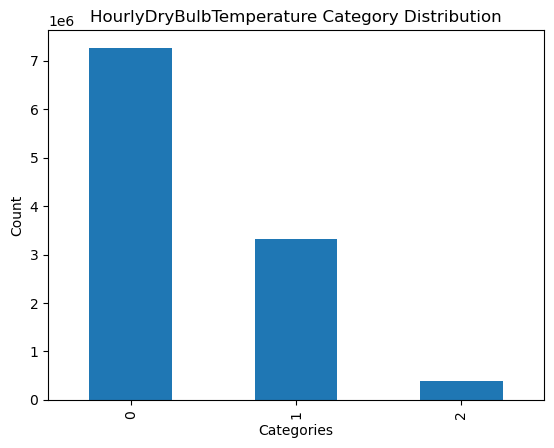

In [20]:
pd.concat([df['HourlyDryBulbTemperature_x_categorised'], df['HourlyDryBulbTemperature_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyDryBulbTemperature Category Distribution')
plt.show()

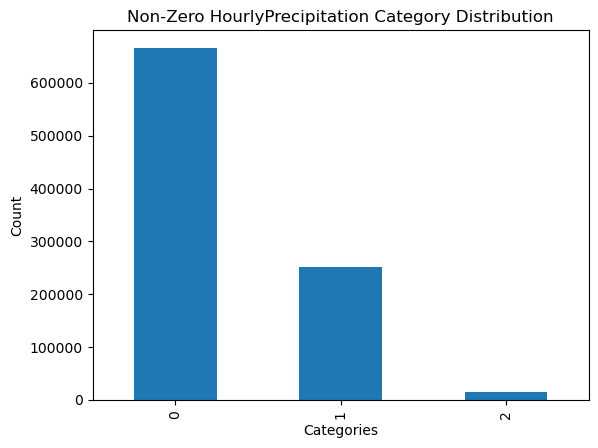

In [21]:
pd.concat([df[df['HourlyPrecipitation_x'] != 0]['HourlyPrecipitation_x_categorised'], df[df['HourlyPrecipitation_y'] != 0]['HourlyPrecipitation_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Non-Zero HourlyPrecipitation Category Distribution')
plt.show()

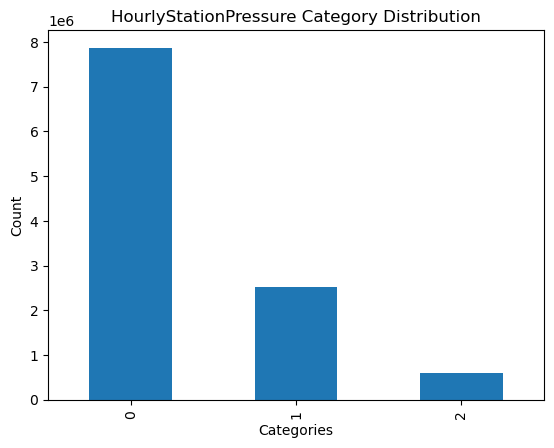

In [22]:
pd.concat([df['HourlyStationPressure_x_categorised'], df['HourlyStationPressure_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyStationPressure Category Distribution')
plt.show()

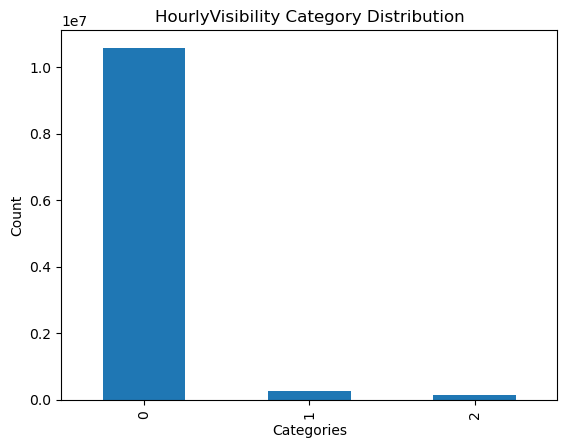

In [23]:
pd.concat([df['HourlyVisibility_x_categorised'], df['HourlyVisibility_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyVisibility Category Distribution')
plt.show()

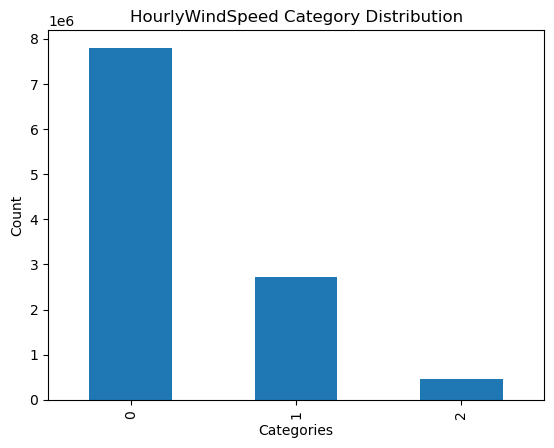

In [24]:
pd.concat([df['HourlyWindSpeed_x_categorised'], df['HourlyWindSpeed_y_categorised']]).value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('HourlyWindSpeed Category Distribution')
plt.show()

In [25]:
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,departure_delay_categorised,arrival_delay,arrival_delay_categorised,...,HourlyDryBulbTemperature_y,HourlyDryBulbTemperature_y_categorised,HourlyPrecipitation_y,HourlyPrecipitation_y_categorised,HourlyStationPressure_y,HourlyStationPressure_y_categorised,HourlyVisibility_y,HourlyVisibility_y_categorised,HourlyWindSpeed_y,HourlyWindSpeed_y_categorised
0,AS,121,SEA,ANC,2019-07-01,215,0,0,-16,0,...,57.0,0,0.0,0,30.04,1,10.0,0,3.0,0
3,F9,402,LAX,DEN,2019-07-01,143,-1,0,-7,0,...,62.0,0,0.0,0,24.69,0,10.0,0,8.0,0
4,F9,790,PDX,DEN,2019-07-01,156,21,1,10,0,...,62.0,0,0.0,0,24.70,0,8.0,0,10.0,0
5,F9,662,SFO,DEN,2019-07-01,158,106,2,84,2,...,62.0,0,0.0,0,24.70,0,8.0,0,10.0,0
6,AS,135,ORD,ANC,2019-07-01,400,-9,0,-4,0,...,57.0,0,0.0,0,30.06,1,10.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512898,DL,3526,ATL,MGM,2019-05-31,59,-1,0,-18,0,...,74.0,0,0.0,0,29.67,1,10.0,0,6.0,0
5512899,DL,508,ATL,BHM,2019-05-31,55,-3,0,-6,0,...,74.0,0,0.0,0,29.26,0,10.0,0,0.0,1
5512900,DL,1075,ATL,HSV,2019-05-31,57,31,1,18,1,...,71.0,0,0.0,0,29.20,1,10.0,0,3.0,0
5512901,DL,2436,ATL,BHM,2019-05-31,56,28,1,13,0,...,67.0,0,0.0,0,29.24,1,10.0,0,0.0,1


In [26]:
df.to_csv('df.csv')